### Algoritmos de clasificacion con la base de datos ENDUTIH

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #para clasificar los datos
import sklearn as sk #para normalizar los datos
import seaborn as sns
from sklearn import tree

In [4]:
path1= 'C:/Users/alejandro/Desktop/ProyectoFinal Delfin/Limpiados/tr_vivienda.csv'
df_Vivienda=pd.read_csv(path1,low_memory=False,index_col=0)

In [5]:
df_Vivienda.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,RESUL_V,CD_ENDUTIH,DOMINIO,ENT,cluster
UPM,,,,,,,,,,,,,,,
100008,1,3,1,1,1,1,1,4,1,1,1,14,1,1,0
100008,2,3,1,1,1,1,1,4,1,1,1,14,1,1,0
100008,3,3,1,1,1,1,1,2,1,1,1,14,1,1,0
100008,4,3,1,1,1,1,2,4,2,4,1,14,1,1,0
100010,1,3,1,1,1,1,1,3,1,1,1,14,1,1,0


In [6]:
df_Vivienda.drop('cluster',axis=1,inplace=True)

In [7]:
df_vivienda_copy=df_Vivienda

In [8]:
df_vivienda_copy = sk.preprocessing.normalize(df_vivienda_copy)

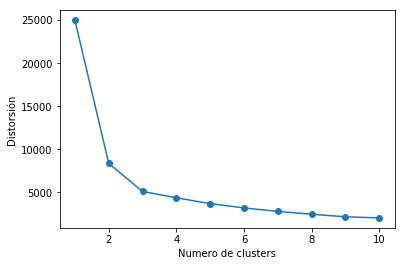

In [9]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                random_state=0)
    km.fit(df_vivienda_copy)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [12]:
print(np.unique(km.fit_predict(df_vivienda_copy)))
y_km = km.fit_predict(df_vivienda_copy)
y_km

[0 1 2 3 4 5 6 7 8 9]


array([4, 4, 4, ..., 1, 1, 1])

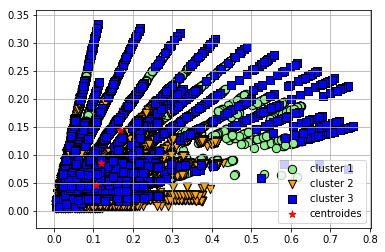

In [155]:
plt.scatter(df_vivienda_copy[y_km==0,0],
          df_vivienda_copy[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df_vivienda_copy[y_km==1,0],
          df_vivienda_copy[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df_vivienda_copy[y_km==2,0],
          df_vivienda_copy[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_vivienda_copy)
df_vivienda_copy=pca.transform(df_vivienda_copy)

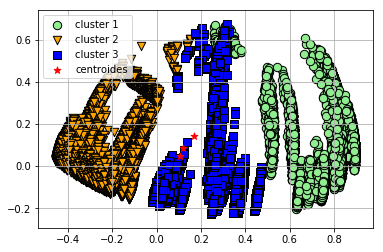

In [157]:
plt.scatter(df_vivienda_copy[y_km==0,0],
          df_vivienda_copy[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df_vivienda_copy[y_km==1,0],
          df_vivienda_copy[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df_vivienda_copy[y_km==2,0],
          df_vivienda_copy[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

In [158]:
from sklearn.cluster import Birch

In [176]:
df_vivienda_copy=df_Vivienda
df_vivienda_copy = sk.preprocessing.normalize(df_vivienda_copy)
brc = Birch(branching_factor=50, n_clusters=None, threshold=0.3,compute_labels=True)

In [182]:
brc.fit(df_vivienda_copy)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.3)

In [183]:
y_km = brc.fit_predict(df_vivienda_copy)

In [179]:
print(np.unique(brc.fit_predict(df_vivienda_copy)))

[ 0  1  2  3  4  5  6  7  8  9 10]


In [180]:
brc.predict(df_vivienda_copy)

array([0, 0, 0, ..., 0, 0, 0])

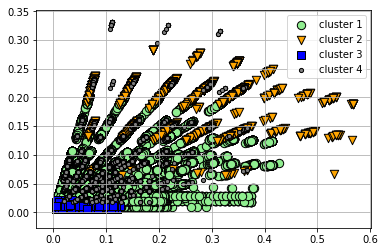

In [181]:
plt.scatter(df_vivienda_copy[y_km==0,0],
          df_vivienda_copy[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df_vivienda_copy[y_km==1,0],
          df_vivienda_copy[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df_vivienda_copy[y_km==2,0],
          df_vivienda_copy[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(df_vivienda_copy[y_km==3,0],
          df_vivienda_copy[y_km==3,1],
          s=70,
          c='grey',
          edgecolor='black',
          marker='.',
          label='cluster 4')

plt.legend()
plt.grid()
plt.show()

In [165]:
df_Vivienda['cluster']=brc.predict(df_vivienda_copy)

In [166]:
df_Vivienda

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,RESUL_V,CD_ENDUTIH,DOMINIO,ENT,cluster
UPM,,,,,,,,,,,,,,,
100008,1,3,1,1,1,1,1,4,1,1,1,14,1,1,0
100008,2,3,1,1,1,1,1,4,1,1,1,14,1,1,0
100008,3,3,1,1,1,1,1,2,1,1,1,14,1,1,0
100008,4,3,1,1,1,1,2,4,2,4,1,14,1,1,0
100010,1,3,1,1,1,1,1,3,1,1,1,14,1,1,0
100010,2,3,1,1,1,1,1,2,1,1,1,14,1,1,0
100010,3,3,1,1,1,1,1,1,1,1,1,14,1,1,0
100010,4,3,1,1,1,1,1,3,1,1,1,14,1,1,0
100010,5,3,1,1,1,1,1,3,1,1,1,14,1,1,0


In [ ]:
path='C:/Users/alejandro/Desktop/ProyectoFinal Delfin/Limpiados/tr_vivienda.csv'

df_Vivienda.to_csv(path_or_buf=path,index=True, encoding='utf-8')

In [137]:
from sklearn.decomposition import PCA

In [138]:
pca = PCA(n_components=2)
pca.fit(df_vivienda_copy)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [139]:
print(pca.explained_variance_ratio_)

[0.83589965 0.07762192]


In [140]:
pca.score_samples(df_vivienda_copy)

array([ 9.99661338, 15.4364969 , 20.90414828, ..., 28.87915479,
       25.79037979, 28.17456901])

In [141]:
df_vivienda_copy=pca.transform(df_vivienda_copy)

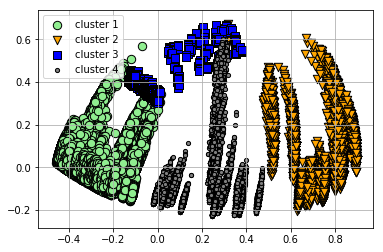

In [142]:
plt.scatter(df_vivienda_copy[y_km==0,0],
          df_vivienda_copy[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df_vivienda_copy[y_km==1,0],
          df_vivienda_copy[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df_vivienda_copy[y_km==2,0],
          df_vivienda_copy[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(df_vivienda_copy[y_km==3,0],
          df_vivienda_copy[y_km==3,1],
          s=70,
          c='grey',
          edgecolor='black',
          marker='.',
          label='cluster 4')

plt.legend()
plt.grid()
plt.show()